In [1]:
from settings import *

In [2]:
import pandas as pd

In [3]:
ais_train = pd.read_csv(AIS_TRAIN, sep='|')
ais_train['time'] = pd.to_datetime(ais_train['time'])

In [4]:
vessels = pd.read_csv(VESSELS, sep='|')
vessels.head()

,shippingLineId,vesselId,CEU,DWT,GT,NT,vesselType,breadth,depth,draft,enginePower,freshWater,fuel,homePort,length,maxHeight,maxSpeed,maxWidth,rampCapacity,yearBuilt
0,61a8e672f9cba188601e84ab,61e9f38eb937134a3c4bfd8b,6500,21200.0,58684,17606.0,83.0,32.0,22.20,NaN,0.0,NaN,NaN,OSLO,199.00,5.0,18.6,15.2,150.0,2000
1,61ec94f1a8cafc0e93f0e92a,61e9f38eb937134a3c4bfd8d,4902,12325.0,46800,NaN,83.0,31.0,NaN,NaN,14220.0,NaN,NaN,MONROVIA,182.00,NaN,NaN,NaN,NaN,2006
2,61e213d5d612676a0f0fb755,61e9f38eb937134a3c4bfd8f,5000,13059.0,46800,NaN,83.0,31.0,NaN,NaN,14220.0,NaN,NaN,SAINT JOHN'S,182.00,NaN,NaN,NaN,NaN,2010
3,61be24574ea00ae59d0fe388,61e9f38eb937134a3c4bfd91,4200,12588.0,39362,NaN,83.0,28.0,NaN,NaN,11060.0,NaN,NaN,NaN,167.00,NaN,NaN,NaN,NaN,2011
4,61a8e673f9cba188601e84ae,61e9f390b937134a3c4bfd93,7450,21052.0,75528,24391.0,83.0,37.2,22.23,NaN,13140.0,491.47,3236.78,Panama,199.98,NaN,NaN,NaN,NaN,2018


In [5]:
# pd.read_csv(SCHEDULES_TO_MAY_2024, sep="|")

In [6]:
ais_test = pd.read_csv(AIS_TEST, sep=",")
ais_test['time'] = pd.to_datetime(ais_test['time'])

In [7]:
ais_test.head()

,ID,vesselId,time,scaling_factor
0,0,61e9f3aeb937134a3c4bfe3d,2024-05-08 00:03:16,0.3
1,1,61e9f473b937134a3c4c02df,2024-05-08 00:06:17,0.3
2,2,61e9f469b937134a3c4c029b,2024-05-08 00:10:02,0.3
3,3,61e9f45bb937134a3c4c0221,2024-05-08 00:10:34,0.3
4,4,61e9f38eb937134a3c4bfd8d,2024-05-08 00:12:27,0.3


In [8]:
len(ais_test["vesselId"].unique())

215

In [9]:
# pd.merge(ais_test, vessels, on="vesselId").dropna(subset="length")

In [10]:
# ais_test.sort_values(by=["vesselId", "time"]).iloc[:1]

In [11]:
# ais_test.value_counts(subset="vesselId")

In [12]:
# ais_test[ais_test["vesselId"]=="61e9f38eb937134a3c4bfd8d"]

In [13]:
# ais_test['time'] = pd.to_datetime(ais_test['time'])
# ais_test['time_diff'] = ais_test['time'].diff()

# mean_time_diff = ais_test['time_diff'].mean()
# std_diff = ais_test['time_diff'].std()
# print(mean_time_diff, std_diff)

In [14]:
ais_test['time'] = pd.to_datetime(ais_test['time'])
ais_test['time_diff'] = ais_test.sort_values(by=['vesselId', 'time']).groupby("vesselId")['time'].diff()

mean_time_diff_per_id = ais_test.groupby('vesselId')['time_diff'].mean()

print(mean_time_diff_per_id)

vesselId
61e9f38eb937134a3c4bfd8d    0 days 00:29:49.402489626
61e9f399b937134a3c4bfdb7    0 days 00:20:00.108635097
61e9f39ab937134a3c4bfdbb    0 days 00:23:40.431095406
61e9f39db937134a3c4bfdc5    0 days 00:34:25.834951456
61e9f39eb937134a3c4bfdcb    0 days 00:19:58.707520891
                                       ...           
clh6aqawa0001gh0zmijpuho1   0 days 00:20:41.489913544
clh6aqawa0002gh0zypfa5dut   0 days 00:27:05.792452830
clh6aqawa0004gh0z12aogec9   0 days 00:40:47.869318181
clh6aqawa0006gh0zje911dl3   0 days 00:31:24.408888888
clh6aqawa0007gh0z9h6zi9bo   0 days 00:22:30.416927899
Name: time_diff, Length: 215, dtype: timedelta64[ns]


In [15]:
mean_time_diff_per_id.describe()

count                          215
mean     0 days 00:28:40.520028904
std      0 days 00:08:34.427571926
min      0 days 00:19:58.707520891
25%      0 days 00:21:18.259893822
50%      0 days 00:26:43.238805970
75%      0 days 00:32:03.652573529
max      0 days 00:55:17.008064516
Name: time_diff, dtype: object

In [16]:
ais_test.sort_values(by=['vesselId', 'time'])

,ID,vesselId,time,scaling_factor,time_diff
4,4,61e9f38eb937134a3c4bfd8d,2024-05-08 00:12:27,0.3,NaT
201,201,61e9f38eb937134a3c4bfd8d,2024-05-08 00:39:27,0.3,0 days 00:27:00
583,583,61e9f38eb937134a3c4bfd8d,2024-05-08 01:33:28,0.3,0 days 00:54:01
701,701,61e9f38eb937134a3c4bfd8d,2024-05-08 01:51:26,0.3,0 days 00:17:58
829,829,61e9f38eb937134a3c4bfd8d,2024-05-08 02:03:29,0.3,0 days 00:12:03
...,...,...,...,...,...
51161,51161,clh6aqawa0007gh0z9h6zi9bo,2024-05-12 22:37:33,0.1,0 days 00:20:13
51302,51302,clh6aqawa0007gh0z9h6zi9bo,2024-05-12 22:58:05,0.1,0 days 00:20:32
51444,51444,clh6aqawa0007gh0z9h6zi9bo,2024-05-12 23:18:20,0.1,0 days 00:20:15
51595,51595,clh6aqawa0007gh0z9h6zi9bo,2024-05-12 23:39:21,0.1,0 days 00:21:01


In [17]:
ais_test['time_diff'].describe()

count                        51524
mean     0 days 00:26:49.650065988
std      0 days 01:14:57.837493621
min                0 days 00:00:06
25%                0 days 00:19:47
50%                0 days 00:20:40
75%                0 days 00:21:00
max                2 days 13:51:31
Name: time_diff, dtype: object

In [18]:
ais_test[ais_test["vesselId"]=="61e9f38eb937134a3c4bfd8d"]

,ID,vesselId,time,scaling_factor,time_diff
4,4,61e9f38eb937134a3c4bfd8d,2024-05-08 00:12:27,0.3,NaT
201,201,61e9f38eb937134a3c4bfd8d,2024-05-08 00:39:27,0.3,0 days 00:27:00
583,583,61e9f38eb937134a3c4bfd8d,2024-05-08 01:33:28,0.3,0 days 00:54:01
701,701,61e9f38eb937134a3c4bfd8d,2024-05-08 01:51:26,0.3,0 days 00:17:58
829,829,61e9f38eb937134a3c4bfd8d,2024-05-08 02:03:29,0.3,0 days 00:12:03
...,...,...,...,...,...
51092,51092,61e9f38eb937134a3c4bfd8d,2024-05-12 22:37:04,0.1,0 days 00:19:48
51246,51246,61e9f38eb937134a3c4bfd8d,2024-05-12 22:57:46,0.1,0 days 00:20:42
51377,51377,61e9f38eb937134a3c4bfd8d,2024-05-12 23:17:45,0.1,0 days 00:19:59
51531,51531,61e9f38eb937134a3c4bfd8d,2024-05-12 23:38:59,0.1,0 days 00:21:14


In [19]:
ais_test.sort_values(by=["vesselId", "time"]).iloc[240:]

,ID,vesselId,time,scaling_factor,time_diff
51531,51531,61e9f38eb937134a3c4bfd8d,2024-05-12 23:38:59,0.1,0 days 00:21:14
51708,51708,61e9f38eb937134a3c4bfd8d,2024-05-12 23:59:53,0.1,0 days 00:20:54
99,99,61e9f399b937134a3c4bfdb7,2024-05-08 00:19:15,0.3,NaT
249,249,61e9f399b937134a3c4bfdb7,2024-05-08 00:39:54,0.3,0 days 00:20:39
362,362,61e9f399b937134a3c4bfdb7,2024-05-08 00:54:54,0.3,0 days 00:15:00
...,...,...,...,...,...
51161,51161,clh6aqawa0007gh0z9h6zi9bo,2024-05-12 22:37:33,0.1,0 days 00:20:13
51302,51302,clh6aqawa0007gh0z9h6zi9bo,2024-05-12 22:58:05,0.1,0 days 00:20:32
51444,51444,clh6aqawa0007gh0z9h6zi9bo,2024-05-12 23:18:20,0.1,0 days 00:20:15
51595,51595,clh6aqawa0007gh0z9h6zi9bo,2024-05-12 23:39:21,0.1,0 days 00:21:01


In [20]:
ais_test["time_diff"].value_counts()

time_diff
0 days 00:21:00    5034
0 days 00:21:01    1912
0 days 00:20:59    1769
0 days 00:18:00    1429
0 days 00:20:30    1040
                   ... 
0 days 00:55:48       1
0 days 11:56:50       1
0 days 00:26:50       1
0 days 11:09:13       1
0 days 07:24:58       1
Name: count, Length: 3242, dtype: int64

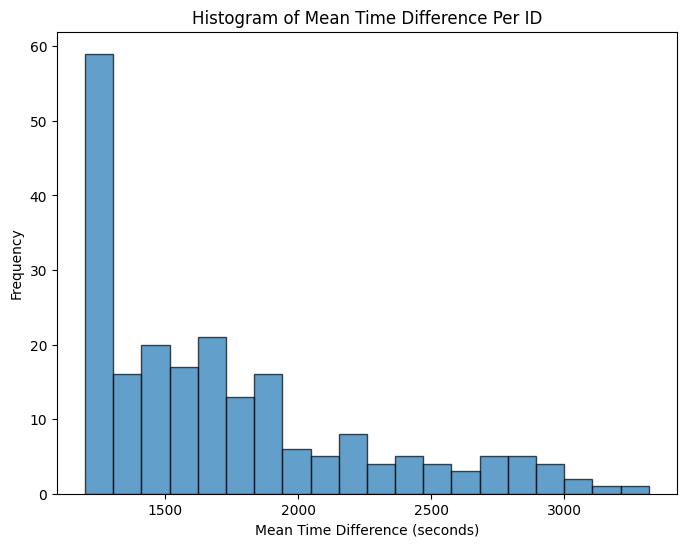

In [21]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(8,6))
plt.hist(mean_time_diff_per_id.dt.total_seconds(), bins=20, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Mean Time Difference (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Time Difference Per ID')

# Show the plot
plt.show()

In [22]:

def make_features(df: pd.DataFrame) -> pd.DataFrame:
    raw = df.copy()

    # time_diff: difference of time since last measure
    raw['time'] = pd.to_datetime(raw['time'])
    raw['time_diff'] = raw.sort_values(by=['vesselId', 'time']).groupby("vesselId")['time'].diff()
    
    
    return raw

In [23]:
ais_tr = make_features(ais_train)

In [24]:
ais_tr.describe()

,time,cog,sog,rot,heading,navstat,latitude,longitude,time_diff
count,1522065,1.522065e+06,1.522065e+06,1.522065e+06,1.522065e+06,1.522065e+06,1.522065e+06,1.522065e+06,1521377
mean,2024-03-06 03:20:23.657231360,1.782494e+02,6.331703e+00,5.054561e-01,1.762737e+02,2.092604e+00,3.658497e+01,1.153646e+01,0 days 01:17:33.035565806
min,2024-01-01 00:00:25,0.000000e+00,0.000000e+00,-1.270000e+02,0.000000e+00,0.000000e+00,-4.753287e+01,-1.675409e+02,0 days 00:00:02
25%,2024-02-03 02:59:19,7.820000e+01,0.000000e+00,0.000000e+00,7.500000e+01,0.000000e+00,3.451683e+01,-5.212810e+00,0 days 00:19:04
50%,2024-03-07 12:34:57,1.838000e+02,5.000000e-01,0.000000e+00,1.800000e+02,0.000000e+00,4.223370e+01,4.234350e+00,0 days 00:20:38
75%,2024-04-07 07:37:36,2.690000e+02,1.410000e+01,0.000000e+00,2.650000e+02,5.000000e+00,5.135197e+01,1.883715e+01,0 days 00:21:01
max,2024-05-07 23:59:08,3.600000e+02,1.023000e+02,1.280000e+02,5.110000e+02,1.500000e+01,7.055720e+01,1.788054e+02,68 days 13:22:55
std,NaN,1.076785e+02,7.539364e+00,1.760916e+01,1.070860e+02,2.411965e+00,2.290488e+01,6.871572e+01,0 days 14:42:26.590518861


In [25]:
te = ais_test.copy()

# time_diff: difference of time since last measure
te['time'] = pd.to_datetime(te['time'])
te['time_diff'] = te.sort_values(by=['vesselId', 'time']).groupby("vesselId")['time'].diff()

In [26]:
te.sort_values(by=["vesselId", "time"])

,ID,vesselId,time,scaling_factor,time_diff
4,4,61e9f38eb937134a3c4bfd8d,2024-05-08 00:12:27,0.3,NaT
201,201,61e9f38eb937134a3c4bfd8d,2024-05-08 00:39:27,0.3,0 days 00:27:00
583,583,61e9f38eb937134a3c4bfd8d,2024-05-08 01:33:28,0.3,0 days 00:54:01
701,701,61e9f38eb937134a3c4bfd8d,2024-05-08 01:51:26,0.3,0 days 00:17:58
829,829,61e9f38eb937134a3c4bfd8d,2024-05-08 02:03:29,0.3,0 days 00:12:03
...,...,...,...,...,...
51161,51161,clh6aqawa0007gh0z9h6zi9bo,2024-05-12 22:37:33,0.1,0 days 00:20:13
51302,51302,clh6aqawa0007gh0z9h6zi9bo,2024-05-12 22:58:05,0.1,0 days 00:20:32
51444,51444,clh6aqawa0007gh0z9h6zi9bo,2024-05-12 23:18:20,0.1,0 days 00:20:15
51595,51595,clh6aqawa0007gh0z9h6zi9bo,2024-05-12 23:39:21,0.1,0 days 00:21:01


In [27]:
ais_train

,time,cog,sog,rot,heading,navstat,etaRaw,latitude,longitude,vesselId,portId
0,2024-01-01 00:00:25,284.0,0.7,0,88,0,01-09 23:00,-34.74370,-57.85130,61e9f3a8b937134a3c4bfdf7,61d371c43aeaecc07011a37f
1,2024-01-01 00:00:36,109.6,0.0,-6,347,1,12-29 20:00,8.89440,-79.47939,61e9f3d4b937134a3c4bff1f,634c4de270937fc01c3a7689
2,2024-01-01 00:01:45,111.0,11.0,0,112,0,01-02 09:00,39.19065,-76.47567,61e9f436b937134a3c4c0131,61d3847bb7b7526e1adf3d19
3,2024-01-01 00:03:11,96.4,0.0,0,142,1,12-31 20:00,-34.41189,151.02067,61e9f3b4b937134a3c4bfe77,61d36f770a1807568ff9a126
4,2024-01-01 00:03:51,214.0,19.7,0,215,0,01-25 12:00,35.88379,-5.91636,61e9f41bb937134a3c4c0087,634c4de270937fc01c3a74f3
...,...,...,...,...,...,...,...,...,...,...,...
1522060,2024-05-07 23:59:07,359.1,13.4,0,1,0,05-08 05:00,52.19131,-5.82223,clh6aqawa0002gh0zypfa5dut,634c4de270937fc01c3a7417
1522061,2024-05-07 23:59:08,12.3,17.1,0,13,0,05-10 03:00,38.96142,-12.00502,61e9f3aeb937134a3c4bfe43,634c4de270937fc01c3a76a1
1522062,2024-05-07 23:59:08,269.8,14.9,-1,270,0,05-15 23:00,49.71372,-5.22042,61e9f43db937134a3c4c0169,634c4de270937fc01c3a787b
1522063,2024-05-07 23:59:08,8.0,18.7,0,6,0,05-08 12:45,38.27895,10.78280,61e9f469b937134a3c4c029b,61d3781293c6feb83e5eb73b


In [67]:
ais_train.sort_values(by=["vesselId","time"])[["vesselId", "etaRaw", "time"]]

,vesselId,etaRaw,time
131115,61e9f38eb937134a3c4bfd8b,01-08 06:00,2024-01-12 14:07:47
131279,61e9f38eb937134a3c4bfd8b,01-14 23:30,2024-01-12 14:31:00
131514,61e9f38eb937134a3c4bfd8b,01-14 23:30,2024-01-12 14:57:23
131696,61e9f38eb937134a3c4bfd8b,01-14 23:30,2024-01-12 15:18:48
131885,61e9f38eb937134a3c4bfd8b,01-14 23:30,2024-01-12 15:39:47
...,...,...,...
1521244,clh6aqawa0007gh0z9h6zi9bo,05-08 03:00,2024-05-07 22:36:16
1521409,clh6aqawa0007gh0z9h6zi9bo,05-08 03:00,2024-05-07 22:57:05
1521625,clh6aqawa0007gh0z9h6zi9bo,05-08 03:00,2024-05-07 23:17:54
1521821,clh6aqawa0007gh0z9h6zi9bo,05-08 03:00,2024-05-07 23:38:13


In [71]:
ais_train["etaRaw"].isna().sum()

0

In [72]:
lbda = ais_train["etaRaw"].iloc[0]

In [74]:
lbda.split()

['01-09', '23:00']

In [70]:
pd.to_datetime(ais_train["etaRaw"].apply(lambda x: str(x).split()))

/var/folders/dv/nzlg6jm168311nq7f93wfrd80000gn/T/ipykernel_87059/2198967664.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(ais_train["etaRaw"])


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 01-09 23:00, at position 0

In [90]:
# CREATE time_diff AND MAKE IT IN SECONDS

train_vessel_id_time = ais_train[["vesselId", "time"]]
train_vessel_id_time["split"] = "train"
train_vessel_id_time["ID"] = train_vessel_id_time.index

test_vessel_id_time = ais_test[["ID", "vesselId", "time" ]]
test_vessel_id_time["split"] = "test"
all_times_vesselId = pd.concat([train_vessel_id_time, test_vessel_id_time], ignore_index=True)

all_times_vesselId['time_diff'] = all_times_vesselId.sort_values(by=['vesselId', 'time']).groupby("vesselId")['time'].diff().shift(-1)

# arrival time diff (from etaRaw)
# all_times_vesselId['arr_time_diff'] = all_times_vesselId.sort_values(by=['vesselId', 'time']).groupby("vesselId")['time'].diff().shift(-1)

ais_test["time_diff"] = all_times_vesselId[all_times_vesselId["split"]=="test"].sort_values(by="ID").reset_index()["time_diff"]
ais_train["time_diff"] = all_times_vesselId[all_times_vesselId["split"]=="train"].sort_values(by="ID").reset_index()["time_diff"]

nb_dt_na_test = ais_test["time_diff"].isna().sum()
ais_test["time_diff"] = ais_test.sort_values(by=["time_diff"]).iloc[:-nb_dt_na_test]["time_diff"].dt.total_seconds().astype(int)

nb_dt_na_train = ais_train["time_diff"].isna().sum()
ais_train["time_diff"] = ais_train.sort_values(by=["time_diff"]).iloc[:-nb_dt_na_train]["time_diff"].dt.total_seconds().astype(int)

/var/folders/dv/nzlg6jm168311nq7f93wfrd80000gn/T/ipykernel_87059/1845318521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_vessel_id_time["split"] = "train"
/var/folders/dv/nzlg6jm168311nq7f93wfrd80000gn/T/ipykernel_87059/1845318521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_vessel_id_time["ID"] = train_vessel_id_time.index
/var/folders/dv/nzlg6jm168311nq7f93wfrd80000gn/T/ipykernel_87059/1845318521.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [91]:
ais_train.isna().sum()

time            0
cog             0
sog             0
rot             0
heading         0
navstat         0
etaRaw          0
latitude        0
longitude       0
vesselId        0
portId       1615
time_diff     473
dtype: int64

In [92]:
ais_train.sort_values(by=["vesselId", "time"])

,time,cog,sog,rot,heading,navstat,etaRaw,latitude,longitude,vesselId,portId,time_diff
131115,2024-01-12 14:07:47,308.1,17.1,-6,316,0,01-08 06:00,7.50361,77.58340,61e9f38eb937134a3c4bfd8b,61d376b393c6feb83e5eb50c,0 days 00:23:13
131279,2024-01-12 14:31:00,307.6,17.3,5,313,0,01-14 23:30,7.57302,77.49505,61e9f38eb937134a3c4bfd8b,61d376d893c6feb83e5eb546,0 days 00:26:23
131514,2024-01-12 14:57:23,306.8,16.9,5,312,0,01-14 23:30,7.65043,77.39404,61e9f38eb937134a3c4bfd8b,61d376d893c6feb83e5eb546,0 days 00:21:25
131696,2024-01-12 15:18:48,307.9,16.9,6,313,0,01-14 23:30,7.71275,77.31394,61e9f38eb937134a3c4bfd8b,61d376d893c6feb83e5eb546,0 days 00:20:59
131885,2024-01-12 15:39:47,307.0,16.3,7,313,0,01-14 23:30,7.77191,77.23585,61e9f38eb937134a3c4bfd8b,61d376d893c6feb83e5eb546,0 days 00:15:01
...,...,...,...,...,...,...,...,...,...,...,...,...
1521244,2024-05-07 22:36:16,324.1,13.5,-2,325,0,05-08 03:00,59.63337,21.43237,clh6aqawa0007gh0z9h6zi9bo,61d373b83aeaecc07011a62b,0 days 00:20:49
1521409,2024-05-07 22:57:05,324.2,13.3,-3,326,0,05-08 03:00,59.69588,21.34225,clh6aqawa0007gh0z9h6zi9bo,61d373b83aeaecc07011a62b,0 days 00:20:49
1521625,2024-05-07 23:17:54,356.5,12.2,-1,354,0,05-08 03:00,59.76388,21.35317,clh6aqawa0007gh0z9h6zi9bo,61d373b83aeaecc07011a62b,0 days 00:20:19
1521821,2024-05-07 23:38:13,52.6,17.3,3,50,0,05-08 03:00,59.83316,21.38489,clh6aqawa0007gh0z9h6zi9bo,61d373b83aeaecc07011a62b,0 days 00:20:48


In [95]:
len(ais_test["vesselId"].unique()) + 473 == len(ais_train["vesselId"].unique())

True

In [79]:
ais_test.sort_values(by=["vesselId", "time"])

,ID,vesselId,time,scaling_factor,time_diff
4,4,61e9f38eb937134a3c4bfd8d,2024-05-08 00:12:27,0.3,0 days 00:27:00
201,201,61e9f38eb937134a3c4bfd8d,2024-05-08 00:39:27,0.3,0 days 00:54:01
583,583,61e9f38eb937134a3c4bfd8d,2024-05-08 01:33:28,0.3,0 days 00:17:58
701,701,61e9f38eb937134a3c4bfd8d,2024-05-08 01:51:26,0.3,0 days 00:12:03
829,829,61e9f38eb937134a3c4bfd8d,2024-05-08 02:03:29,0.3,0 days 00:33:01
...,...,...,...,...,...
51161,51161,clh6aqawa0007gh0z9h6zi9bo,2024-05-12 22:37:33,0.1,0 days 00:20:32
51302,51302,clh6aqawa0007gh0z9h6zi9bo,2024-05-12 22:58:05,0.1,0 days 00:20:15
51444,51444,clh6aqawa0007gh0z9h6zi9bo,2024-05-12 23:18:20,0.1,0 days 00:21:01
51595,51595,clh6aqawa0007gh0z9h6zi9bo,2024-05-12 23:39:21,0.1,0 days 00:19:42


In [85]:
nb_dt_na_test = ais_test["time_diff"].isna().sum()
# ais_test.sort_values(by=["time_diff"]).iloc[:-nb_dt_na]


,ID,vesselId,time,scaling_factor,time_diff
18680,18680,61e9f469b937134a3c4c029d,2024-05-09 21:35:47,0.25,0 days 00:00:06
39858,39858,61e9f3dbb937134a3c4bff3d,2024-05-11 20:35:17,0.15,0 days 00:00:17
21649,21649,61e9f429b937134a3c4c00e7,2024-05-10 04:15:00,0.20,0 days 00:00:17
35563,35563,61e9f469b937134a3c4c029b,2024-05-11 10:57:35,0.15,0 days 00:00:18
5355,5355,61e9f401b937134a3c4c0003,2024-05-08 13:17:50,0.30,0 days 00:00:18
...,...,...,...,...,...
27176,27176,61e9f43cb937134a3c4c0165,2024-05-10 16:20:50,0.20,1 days 18:54:14
8504,8504,61e9f438b937134a3c4c0147,2024-05-08 21:07:34,0.30,1 days 20:23:16
14955,14955,61e9f469b937134a3c4c0299,2024-05-09 12:43:04,0.25,1 days 20:33:26
6243,6243,61e9f3dfb937134a3c4bff51,2024-05-08 15:35:00,0.30,1 days 22:57:36


In [96]:
ais_test["time_diff"] = ais_test.sort_values(by=["time_diff"]).iloc[:-nb_dt_na_test]["time_diff"].dt.total_seconds().astype(int)

In [100]:
nb_dt_na_test = ais_test["time_diff"].isna().sum()
ais_test["time_diff"] = ais_test.sort_values(by=["time_diff"]).iloc[:-nb_dt_na_test]["time_diff"].dt.total_seconds().astype(int)

nb_dt_na_train = ais_train["time_diff"].isna().sum()
ais_train["time_diff"] = ais_train.sort_values(by=["time_diff"]).iloc[:-nb_dt_na_train]["time_diff"].dt.total_seconds().astype(int)

In [101]:
ais_train

,time,cog,sog,rot,heading,navstat,etaRaw,latitude,longitude,vesselId,portId,time_diff
0,2024-01-01 00:00:25,284.0,0.7,0,88,0,01-09 23:00,-34.74370,-57.85130,61e9f3a8b937134a3c4bfdf7,61d371c43aeaecc07011a37f,22123.0
1,2024-01-01 00:00:36,109.6,0.0,-6,347,1,12-29 20:00,8.89440,-79.47939,61e9f3d4b937134a3c4bff1f,634c4de270937fc01c3a7689,1980.0
2,2024-01-01 00:01:45,111.0,11.0,0,112,0,01-02 09:00,39.19065,-76.47567,61e9f436b937134a3c4c0131,61d3847bb7b7526e1adf3d19,1372.0
3,2024-01-01 00:03:11,96.4,0.0,0,142,1,12-31 20:00,-34.41189,151.02067,61e9f3b4b937134a3c4bfe77,61d36f770a1807568ff9a126,3603.0
4,2024-01-01 00:03:51,214.0,19.7,0,215,0,01-25 12:00,35.88379,-5.91636,61e9f41bb937134a3c4c0087,634c4de270937fc01c3a74f3,85735.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1522060,2024-05-07 23:59:07,359.1,13.4,0,1,0,05-08 05:00,52.19131,-5.82223,clh6aqawa0002gh0zypfa5dut,634c4de270937fc01c3a7417,1209.0
1522061,2024-05-07 23:59:08,12.3,17.1,0,13,0,05-10 03:00,38.96142,-12.00502,61e9f3aeb937134a3c4bfe43,634c4de270937fc01c3a76a1,996.0
1522062,2024-05-07 23:59:08,269.8,14.9,-1,270,0,05-15 23:00,49.71372,-5.22042,61e9f43db937134a3c4c0169,634c4de270937fc01c3a787b,NaN
1522063,2024-05-07 23:59:08,8.0,18.7,0,6,0,05-08 12:45,38.27895,10.78280,61e9f469b937134a3c4c029b,61d3781293c6feb83e5eb73b,654.0


In [108]:
ais_test

,ID,vesselId,time,scaling_factor,time_diff
0,0,61e9f3aeb937134a3c4bfe3d,2024-05-08 00:03:16,0.3,1978.0
1,1,61e9f473b937134a3c4c02df,2024-05-08 00:06:17,0.3,2523.0
2,2,61e9f469b937134a3c4c029b,2024-05-08 00:10:02,0.3,40674.0
3,3,61e9f45bb937134a3c4c0221,2024-05-08 00:10:34,0.3,1761.0
4,4,61e9f38eb937134a3c4bfd8d,2024-05-08 00:12:27,0.3,1620.0
...,...,...,...,...,...
51734,51734,61e9f3a8b937134a3c4bfdf3,2024-05-12 23:59:58,0.1,NaN
51735,51735,61e9f3b4b937134a3c4bfe77,2024-05-12 23:59:58,0.1,NaN
51736,51736,61e9f46cb937134a3c4c02b7,2024-05-12 23:59:58,0.1,NaN
51737,51737,61e9f465b937134a3c4c0269,2024-05-12 23:59:58,0.1,NaN


In [192]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

input_features = ["vesselId", "time",
    'time_diff',
    'cog',
    'sog',
    'rot',
    'heading',
    # 'navstat',
    # 'etaRaw',
    'latitude',
    'longitude',
]
output_features = ["vesselId", "time",
    'cog',
    'sog',
    'rot',
    'heading',
    # 'navstat',
    # 'etaRaw',
    'latitude',
    'longitude',
]


In [193]:
scaler = StandardScaler()

In [194]:
df_train = ais_train.drop(columns="portId")

In [198]:
X = df_train.sort_values(by=["vesselId", "time"]) # [input_features]
X = X.groupby("vesselId").apply(lambda x: x.sort_values(by="time").iloc[:-1]).reset_index(drop=True)[input_features]



/var/folders/dv/nzlg6jm168311nq7f93wfrd80000gn/T/ipykernel_87059/1456698504.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  X = X.groupby("vesselId").apply(lambda x: x.sort_values(by="time").iloc[:-1]).reset_index(drop=True)[input_features]


In [205]:
y = df_train.sort_values(by=["vesselId", "time"]) # [input_features]
y = y.groupby("vesselId").apply(lambda x: x.sort_values(by="time").iloc[1:]).reset_index(drop=True)[output_features]

/var/folders/dv/nzlg6jm168311nq7f93wfrd80000gn/T/ipykernel_87059/4223118840.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  y = y.groupby("vesselId").apply(lambda x: x.sort_values(by="time").iloc[1:]).reset_index(drop=True)[output_features]


In [207]:
X

,vesselId,time,time_diff,cog,sog,rot,heading,latitude,longitude
0,61e9f38eb937134a3c4bfd8b,2024-01-12 14:07:47,1393.0,308.1,17.1,-6,316,7.50361,77.58340
1,61e9f38eb937134a3c4bfd8b,2024-01-12 14:31:00,1583.0,307.6,17.3,5,313,7.57302,77.49505
2,61e9f38eb937134a3c4bfd8b,2024-01-12 14:57:23,1285.0,306.8,16.9,5,312,7.65043,77.39404
3,61e9f38eb937134a3c4bfd8b,2024-01-12 15:18:48,1259.0,307.9,16.9,6,313,7.71275,77.31394
4,61e9f38eb937134a3c4bfd8b,2024-01-12 15:39:47,901.0,307.0,16.3,7,313,7.77191,77.23585
...,...,...,...,...,...,...,...,...,...
1521372,clh6aqawa0007gh0z9h6zi9bo,2024-05-07 22:15:17,1259.0,296.3,14.7,3,298,59.57721,21.54090
1521373,clh6aqawa0007gh0z9h6zi9bo,2024-05-07 22:36:16,1249.0,324.1,13.5,-2,325,59.63337,21.43237
1521374,clh6aqawa0007gh0z9h6zi9bo,2024-05-07 22:57:05,1249.0,324.2,13.3,-3,326,59.69588,21.34225
1521375,clh6aqawa0007gh0z9h6zi9bo,2024-05-07 23:17:54,1219.0,356.5,12.2,-1,354,59.76388,21.35317


In [208]:
y

,vesselId,time,cog,sog,rot,heading,latitude,longitude
0,61e9f38eb937134a3c4bfd8b,2024-01-12 14:31:00,307.6,17.3,5,313,7.57302,77.49505
1,61e9f38eb937134a3c4bfd8b,2024-01-12 14:57:23,306.8,16.9,5,312,7.65043,77.39404
2,61e9f38eb937134a3c4bfd8b,2024-01-12 15:18:48,307.9,16.9,6,313,7.71275,77.31394
3,61e9f38eb937134a3c4bfd8b,2024-01-12 15:39:47,307.0,16.3,7,313,7.77191,77.23585
4,61e9f38eb937134a3c4bfd8b,2024-01-12 15:54:48,307.6,16.1,5,313,7.81285,77.18147
...,...,...,...,...,...,...,...,...
1521372,clh6aqawa0007gh0z9h6zi9bo,2024-05-07 22:36:16,324.1,13.5,-2,325,59.63337,21.43237
1521373,clh6aqawa0007gh0z9h6zi9bo,2024-05-07 22:57:05,324.2,13.3,-3,326,59.69588,21.34225
1521374,clh6aqawa0007gh0z9h6zi9bo,2024-05-07 23:17:54,356.5,12.2,-1,354,59.76388,21.35317
1521375,clh6aqawa0007gh0z9h6zi9bo,2024-05-07 23:38:13,52.6,17.3,3,50,59.83316,21.38489


In [217]:
X = X.drop(columns=["vesselId", "time"])
y = y.drop(columns=["vesselId", "time"])

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, shuffle=False)

In [219]:
X_train

,time_diff,cog,sog,rot,heading,latitude,longitude
0,1393.0,308.1,17.1,-6,316,7.50361,77.58340
1,1583.0,307.6,17.3,5,313,7.57302,77.49505
2,1285.0,306.8,16.9,5,312,7.65043,77.39404
3,1259.0,307.9,16.9,6,313,7.71275,77.31394
4,901.0,307.0,16.3,7,313,7.77191,77.23585
...,...,...,...,...,...,...,...
1369234,1233.0,359.4,5.0,18,3,54.02408,0.00327
1369235,1222.0,150.5,4.5,10,142,54.00532,0.03861
1369236,1258.0,143.5,3.8,-11,142,53.98550,0.05911
1369237,1232.0,137.3,3.1,5,135,53.96798,0.08008


In [223]:
X_test

,time_diff,cog,sog,rot,heading,latitude,longitude
1369239,1211.0,130.4,3.0,1,134,53.94188,0.12226
1369240,1200.0,135.3,2.8,-11,139,53.93066,0.14223
1369241,1239.0,133.3,2.8,4,139,53.92018,0.16172
1369242,901.0,130.0,2.6,6,142,53.90992,0.18234
1369243,1239.0,132.7,2.6,6,143,53.90333,0.19581
...,...,...,...,...,...,...,...
1521372,1259.0,296.3,14.7,3,298,59.57721,21.54090
1521373,1249.0,324.1,13.5,-2,325,59.63337,21.43237
1521374,1249.0,324.2,13.3,-3,326,59.69588,21.34225
1521375,1219.0,356.5,12.2,-1,354,59.76388,21.35317


In [220]:
import xgboost as xgb

In [227]:
params = {
    'n_estimators': 5000,
    'gamma': 0.5,
    'subsample': 0.6,
    'n_estimators': 5000,
    'min_child_weight':  15,
    'colsample_bytree': 0.8,
    'max_depth': 4,
    'eta':  0.005,
    'refresh_leaf': 1,
}

In [231]:
xgb_model = xgb.XGBRegressor(**params)

In [232]:
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    # early_stopping_rounds=50,
    verbose=False,
)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.005, eval_metric=None,
             feature_types=None, gamma=0.5, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=15, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=5000,
             n_jobs=None, num_parallel_tree=None, ...)

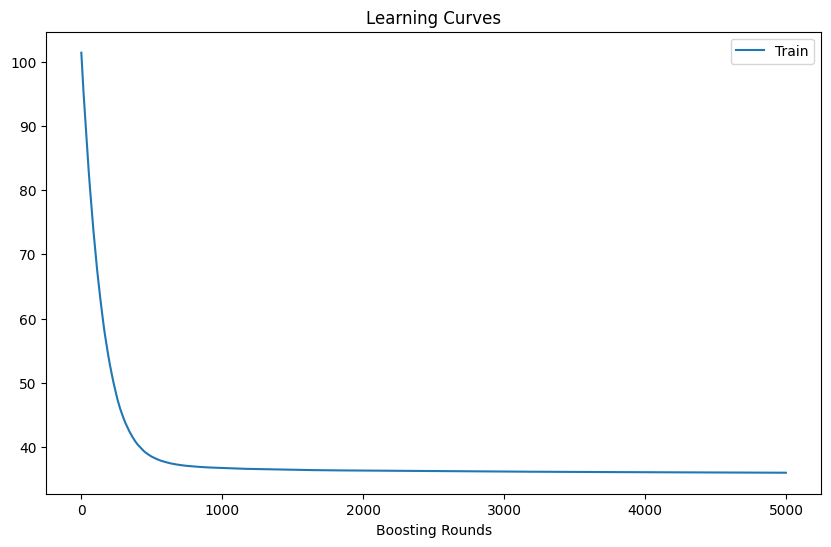

In [242]:
results = xgb_model.evals_result()
train_errors = results['validation_0']['rmse']
# test_errors = results['validation_1']

plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train')
# plt.plot(test_errors, label='Test')
plt.xlabel('Boosting Rounds')
# plt.ylabel(eval_metric)
plt.legend()
plt.title('Learning Curves')
plt.show()

In [243]:
xgb_model.predict(X_test) 

array([[ 1.4651634e+02,  3.4630525e+00,  1.2723962e-02,  1.4078252e+02,
         5.3704498e+01,  5.9489250e-01],
       [ 1.4705899e+02,  3.4584491e+00, -5.2323341e-01,  1.4147450e+02,
         5.3704208e+01,  8.0702001e-01],
       [ 1.4662984e+02,  3.2260602e+00, -1.8273291e-01,  1.4463661e+02,
         5.3704208e+01,  8.0702001e-01],
       ...,
       [ 2.8345627e+02,  1.2908187e+01, -4.7477770e-01,  2.9639502e+02,
         5.9578053e+01,  2.0295628e+01],
       [ 2.0798898e+02,  1.0348566e+01,  2.1743406e-01,  2.1217493e+02,
         5.9811077e+01,  2.0194948e+01],
       [ 6.3339336e+01,  1.7314861e+01, -3.1623983e-01,  5.5381310e+01,
         5.9740639e+01,  2.0279425e+01]], dtype=float32)

In [244]:
y_test

,cog,sog,rot,heading,latitude,longitude
1369239,135.3,2.8,-11,139,53.93066,0.14223
1369240,133.3,2.8,4,139,53.92018,0.16172
1369241,130.0,2.6,6,142,53.90992,0.18234
1369242,132.7,2.6,6,143,53.90333,0.19581
1369243,144.7,4.4,15,150,53.88274,0.22743
...,...,...,...,...,...,...
1521372,324.1,13.5,-2,325,59.63337,21.43237
1521373,324.2,13.3,-3,326,59.69588,21.34225
1521374,356.5,12.2,-1,354,59.76388,21.35317
1521375,52.6,17.3,3,50,59.83316,21.38489


In [249]:
ais_test.iloc[-100:]

,ID,vesselId,time,scaling_factor,time_diff
51639,51639,61e9f3f1b937134a3c4bff8f,2024-05-12 23:58:14,0.1,NaN
51640,51640,61e9f46ab937134a3c4c02a3,2024-05-12 23:58:16,0.1,NaN
51641,51641,61e9f3b1b937134a3c4bfe55,2024-05-12 23:58:18,0.1,NaN
51642,51642,61e9f469b937134a3c4c029d,2024-05-12 23:58:25,0.1,NaN
51643,51643,61e9f440b937134a3c4c0181,2024-05-12 23:58:26,0.1,NaN
...,...,...,...,...,...
51734,51734,61e9f3a8b937134a3c4bfdf3,2024-05-12 23:59:58,0.1,NaN
51735,51735,61e9f3b4b937134a3c4bfe77,2024-05-12 23:59:58,0.1,NaN
51736,51736,61e9f46cb937134a3c4c02b7,2024-05-12 23:59:58,0.1,NaN
51737,51737,61e9f465b937134a3c4c0269,2024-05-12 23:59:58,0.1,NaN
